In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine) 

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = session.query(func.max(measurement.date)).first()[0]
last_date

'2017-08-23'

In [10]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

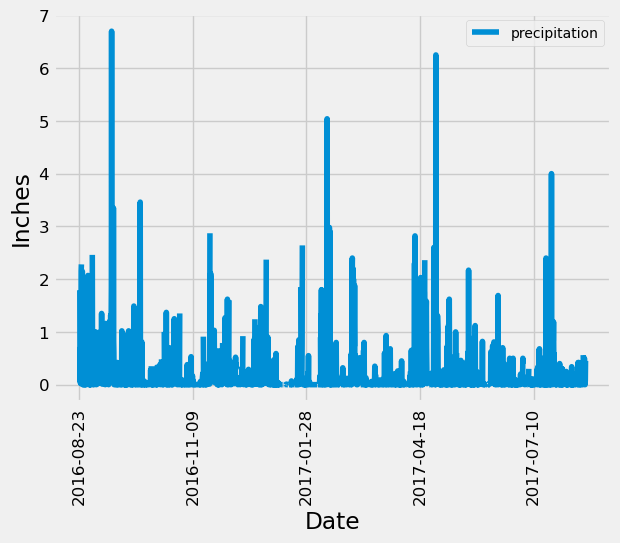

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date,measurement.prcp).filter(measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results,columns=["date","precipitation"])

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot("date","precipitation",xlabel='Date',ylabel='Inches',rot=90,fontsize=12)
plt.legend(loc = "upper right", fontsize=10)
#plt.xticks([1, 2, 3, 4]) 
plt.show()

In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
station_number = session.query(func.count(station.station)).all()[0][0]
station_number

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
conditions = [measurement.station,
              func.count(measurement.station)]
active_stations = session.query(*conditions).\
                               group_by(measurement.station).\
                               order_by(conditions[1].desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

In [86]:
most_active_station_tobs = [func.min(measurement.tobs),
                            func.max(measurement.tobs),
                            func.avg(measurement.tobs)]
most_active_station_tobs_results = session.query(*most_active_station_tobs).\
    filter(measurement.station == active_stations[0][0]).all()
most_active_station_tobs_results

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

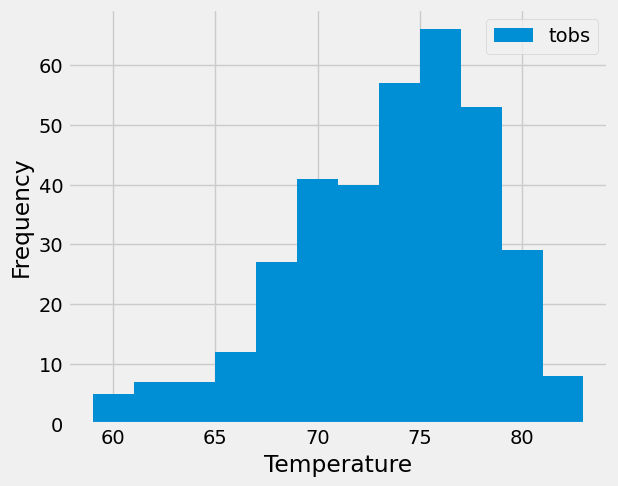

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


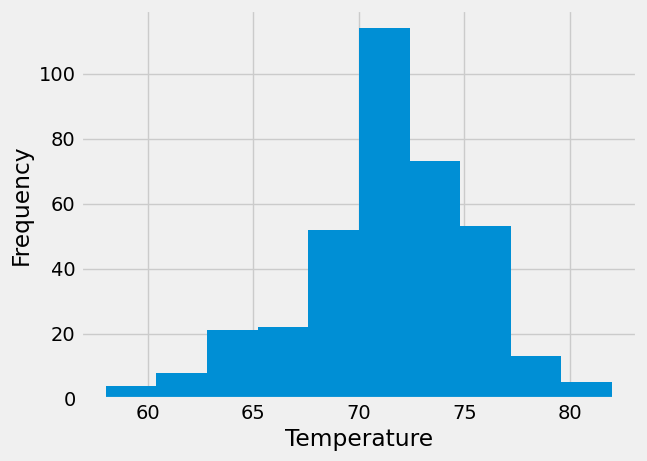

In [87]:
date = dt.datetime(2017,8,23) #2017-08-23
results = session.query(measurement.tobs).\
                        filter(measurement.date <= date).\
                        filter(measurement.station == active_stations[0][0]).limit(365).all()
df = pd.DataFrame(results)
df.hist('tobs')
plt.title('')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [27]:
# Close Session
session.close()

,tobs
count,365.000000
mean,71.320548
std,4.021746
min,58.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,82.000000
